# Predicting Stock market Prices

In [51]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
import plotly.figure_factory as ff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA  # For ARIMA modeling
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error  # For model evaluation

## EDA - Loading and Analysis of Data

In [52]:
## Load and Prepare Data

# Load the stock data
df_am = pd.read_csv('all_data/stock_AMZN.csv', parse_dates=['Date'])
df_fb = pd.read_csv('all_data/stock_FB.csv', parse_dates=['Date'])


In [53]:
df_am = df_am.sort_index()
# Display the first 10 rows of the dataframe
print(df_am.head(10))


        Date       Open       High        Low      Close  Adj Close    Volume
0 1998-11-30  36.604168  36.708332  31.958334  32.000000  32.000000  29752200
1 1998-12-01  30.916666  34.958332  30.333334  34.916668  34.916668  47154600
2 1998-12-02  34.489582  34.583332  32.927082  33.250000  33.250000  29649000
3 1998-12-03  33.187500  34.083332  30.833334  31.583334  31.583334  21836400
4 1998-12-04  32.583332  32.833332  30.416666  31.416666  31.416666  22257600
5 1998-12-07  32.166668  32.333332  30.854166  31.833334  31.833334  15774000
6 1998-12-08  31.604166  34.312500  31.416666  34.010418  34.010418  25549800
7 1998-12-09  34.229168  37.385418  33.666668  36.041668  36.041668  46506600
8 1998-12-10  36.270832  37.333332  34.937500  35.520832  35.520832  30361800
9 1998-12-11  35.010418  37.333332  35.000000  37.166668  37.166668  25467600


In [54]:
print(df_am.index)


RangeIndex(start=0, stop=5033, step=1)


In [55]:

# Show summary statistics and data types of the dataframe
print(df_am.describe())
print("=============================================================")
print(df_am.dtypes)
print(df_am.info())

                                Date         Open         High          Low  \
count                           5033  5033.000000  5033.000000  5033.000000   
mean   2008-11-30 10:19:08.738327040   268.455721   271.483124   265.051296   
min              1998-11-30 00:00:00     5.910000     6.100000     5.510000   
25%              2003-12-02 00:00:00    40.230000    41.000000    39.599998   
50%              2008-12-01 00:00:00    82.900002    84.489998    81.000000   
75%              2013-11-29 00:00:00   306.239990   309.779999   302.720001   
max              2018-11-28 00:00:00  2038.109985  2050.500000  2013.000000   
std                              NaN   394.572625   398.074946   390.068592   

             Close    Adj Close        Volume  
count  5033.000000  5033.000000  5.033000e+03  
mean    268.404035   268.404035  7.320290e+06  
min       5.970000     5.970000  9.844000e+05  
25%      40.299999    40.299999  3.846000e+06  
50%      82.750000    82.750000  5.794100e+06  


In [56]:
# Display the first 10 rows of the dataframe
print(df_fb.head(10))


        Date       Open       High        Low      Close  Adj Close     Volume
0 2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
1 2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2 2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
3 2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   73600000
4 2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   50237200
5 2012-05-25  32.900002  32.950001  31.110001  31.910000  31.910000   37149800
6 2012-05-29  31.480000  31.690001  28.650000  28.840000  28.840000   78063400
7 2012-05-30  28.700001  29.549999  27.860001  28.190001  28.190001   57267900
8 2012-05-31  28.549999  29.670000  26.830000  29.600000  29.600000  111639200
9 2012-06-01  28.889999  29.150000  27.389999  27.719999  27.719999   41855500


In [57]:

# Show summary statistics and data types of the dataframe
print(df_fb.describe())
print("=============================================================")
print(df_fb.dtypes)
print(df_fb.info())

                                Date         Open         High          Low  \
count                           1644  1644.000000  1644.000000  1644.000000   
mean   2015-08-25 16:40:17.518248192    98.181886    99.201350    97.088254   
min              2012-05-18 00:00:00    18.080000    18.270000    17.549999   
25%              2014-01-07 18:00:00    56.042501    57.552501    55.102500   
50%              2015-08-25 12:00:00    92.920002    94.294998    91.860001   
75%              2017-04-12 06:00:00   140.850002   141.605003   139.742504   
max              2018-11-28 00:00:00   215.720001   218.619995   214.270004   
std                              NaN    52.852539    53.236325    52.453441   

             Close    Adj Close        Volume  
count  1644.000000  1644.000000  1.644000e+03  
mean     98.188570    98.188570  3.609972e+07  
min      17.730000    17.730000  5.913100e+06  
25%      56.082499    56.082499  1.812308e+07  
50%      93.099998    93.099998  2.644320e+07  


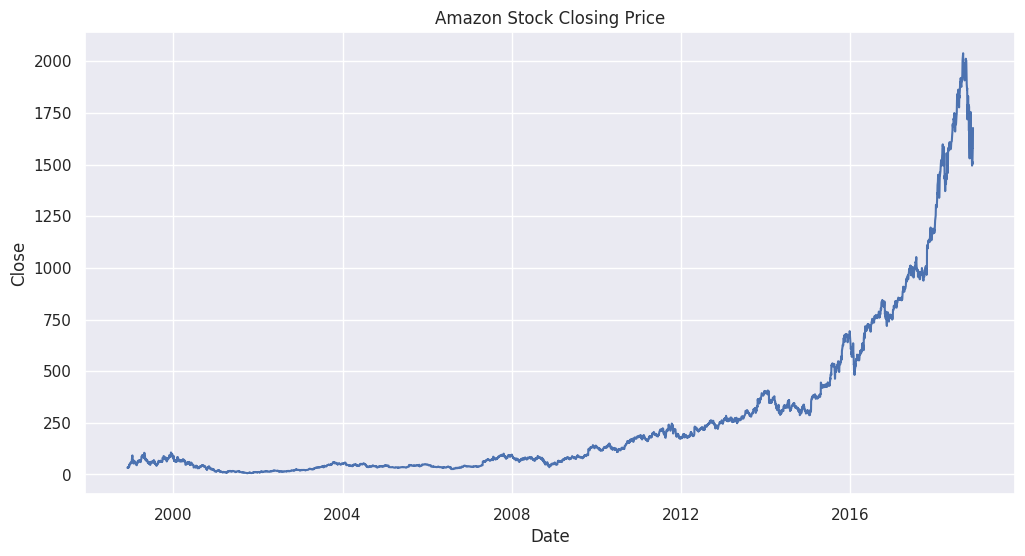

In [58]:
# Plotting the closing price of the Amazon stock data using seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Amazon Stock Closing Price')
sns.lineplot(x=df_am['Date'], y=df_am['Close'])
plt.show()



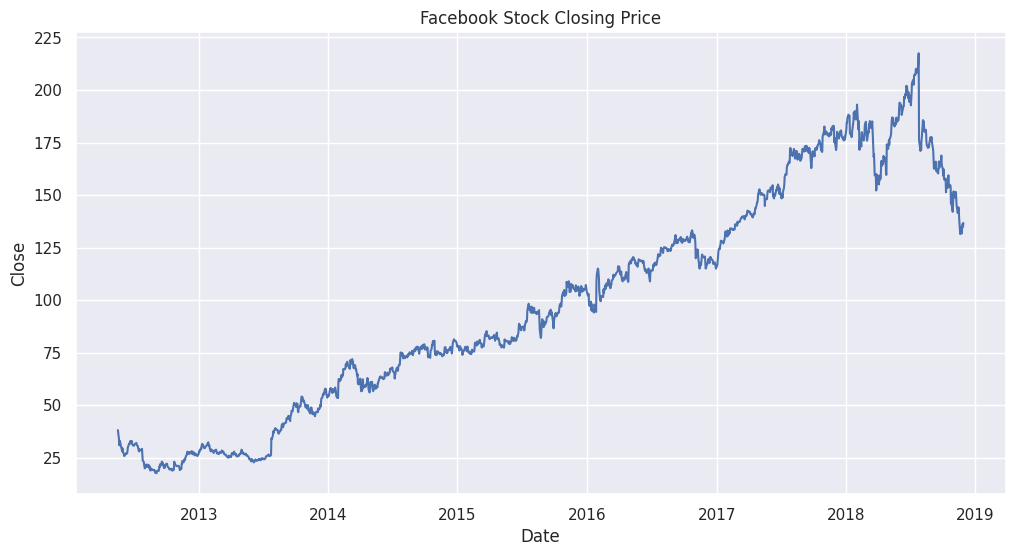

In [59]:
# Plotting the closing price of the Facebook stock data using seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
plt.title('Facebook Stock Closing Price')
sns.lineplot(x=df_fb['Date'], y=df_fb['Close'])
plt.show()

In [60]:
# Converting the dataframe considering only timestamp and closing price
df_am = df_am[['Date', 'Close']]
df_fb = df_fb[['Date', 'Close']]
df_am['Date'] = pd.to_datetime(df_am['Date'])
df_fb['Date'] = pd.to_datetime(df_fb['Date'])
print(df_am.head())
print(df_fb.head())


        Date      Close
0 1998-11-30  32.000000
1 1998-12-01  34.916668
2 1998-12-02  33.250000
3 1998-12-03  31.583334
4 1998-12-04  31.416666
        Date      Close
0 2012-05-18  38.230000
1 2012-05-21  34.029999
2 2012-05-22  31.000000
3 2012-05-23  32.000000
4 2012-05-24  33.029999


In [61]:
# setting date as index
df_am.set_index('Date', inplace=True)
df_fb.set_index('Date', inplace=True)
print(df_am.head())
print(df_fb.head())
print(df_am.tail())



                Close
Date                 
1998-11-30  32.000000
1998-12-01  34.916668
1998-12-02  33.250000
1998-12-03  31.583334
1998-12-04  31.416666
                Close
Date                 
2012-05-18  38.230000
2012-05-21  34.029999
2012-05-22  31.000000
2012-05-23  32.000000
2012-05-24  33.029999
                  Close
Date                   
2018-11-21  1516.729980
2018-11-23  1502.060059
2018-11-26  1581.329956
2018-11-27  1581.420044
2018-11-28  1677.750000


In [62]:
# Display info about time series
print(df_am.info())
print(df_fb.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 1998-11-30 to 2018-11-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5033 non-null   float64
dtypes: float64(1)
memory usage: 78.6 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 2012-05-18 to 2018-11-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1644 non-null   float64
dtypes: float64(1)
memory usage: 25.7 KB
None


In [63]:
# Cheking for missing values
print(df_am.isnull().sum())

Close    0
dtype: int64


In [64]:
print(df_fb.isnull().sum())

Close    0
dtype: int64


## Stationarity - Tests and Conversion

In [65]:
## Stationarity Check using dickey fuller test - amazon
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df_am['Close'])
print('ADF Statistic: %f' % test_results[0])    
print('p-value: %f' % test_results[1])
print('Critical Values:')
for key, value in test_results[4].items():
    print('\t%s: %.3f' % (key, value))
if test_results[1] < 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Failed to reject the null hypothesis: The time series is non-stationary.')


ADF Statistic: 2.535520
p-value: 0.999060
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Failed to reject the null hypothesis: The time series is non-stationary.


In [66]:
#stationarity check
from statsmodels.tsa.stattools import adfuller
test_results = adfuller(df_fb['Close'])
print('ADF Statistic: %f' % test_results[0])    
print('p-value: %f' % test_results[1])
print('Critical Values:')
for key, value in test_results[4].items():
    print('\t%s: %.3f' % (key, value))
if test_results[1] < 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Failed to reject the null hypothesis: The time series is non-stationary.')


ADF Statistic: -1.043445
p-value: 0.737091
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to reject the null hypothesis: The time series is non-stationary.


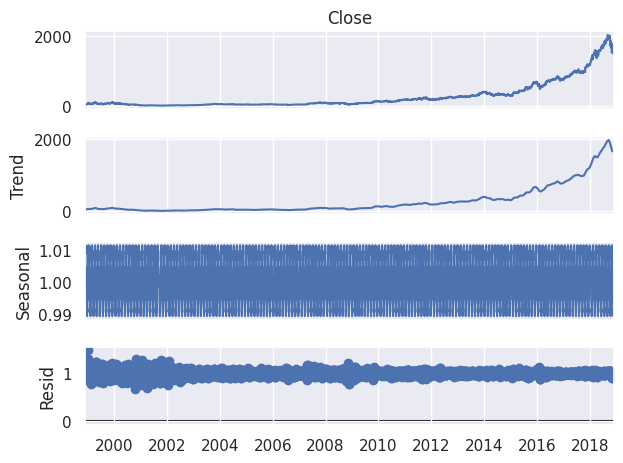

In [67]:
#seperating trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_am['Close'], model='multiplicative', period=30)
result.plot()
plt.show()


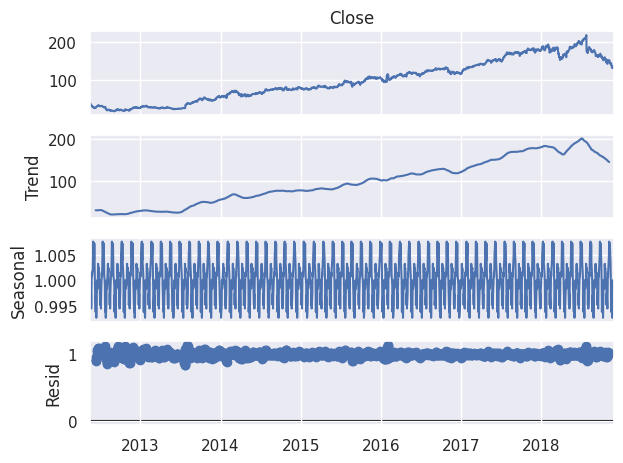

In [68]:
#seperating trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_fb['Close'], model='multiplicative', period=30)
result.plot()
plt.show()


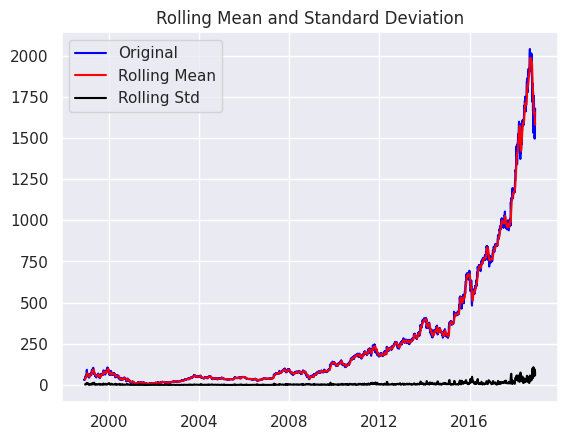

Results of dickey fuller test
Test Statistics                   2.535520
p-value                           0.999060
No. of lags used                 30.000000
Number of observations used    5002.000000
critical value (1%)              -3.431658
critical value (5%)              -2.862118
critical value (10%)             -2.567078
dtype: float64


In [69]:
## Plot rolling statistics and standard deviation
#Test for staionarity
def test_stationarity_rolling(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity_rolling(df_am['Close'])

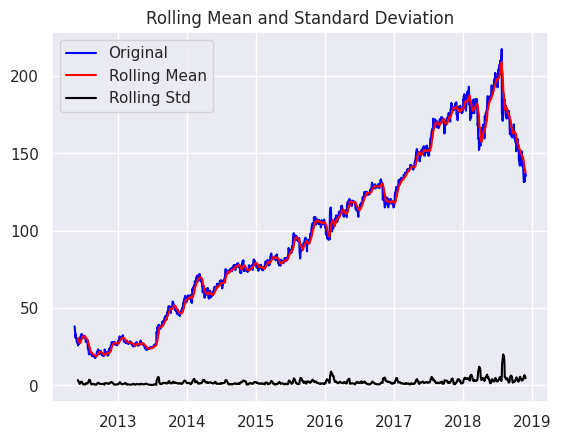

Results of dickey fuller test
Test Statistics                  -1.043445
p-value                           0.737091
No. of lags used                  0.000000
Number of observations used    1643.000000
critical value (1%)              -3.434336
critical value (5%)              -2.863301
critical value (10%)             -2.567707
dtype: float64


In [70]:
test_stationarity_rolling(df_fb['Close'])

### Removal of Non-stationarity using Log transformation - Moving average

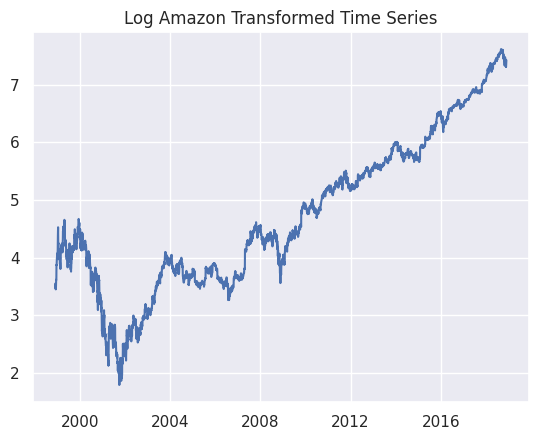

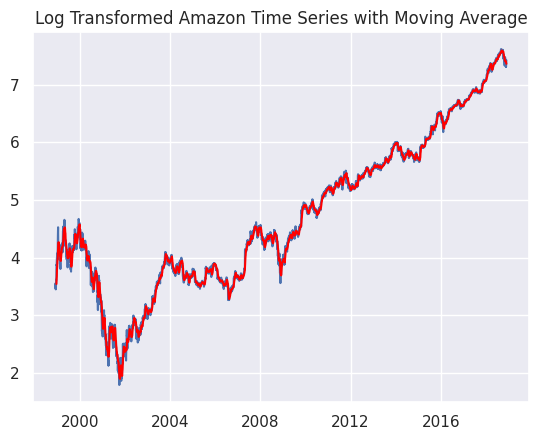

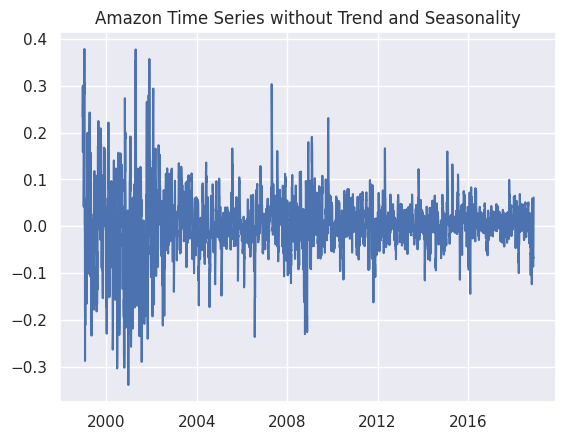

ADF Statistic: -12.011773
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject the null hypothesis: The time series is stationary.


In [71]:
# Apply log transformation
am_logScale = np.log(df_am['Close'])
plt.plot(am_logScale)
plt.title('Log Amazon Transformed Time Series')
plt.show()

# Calculate moving average
movingAverage = am_logScale.rolling(window=12).mean()
movingSTD = am_logScale.rolling(window=12).std()
plt.plot(am_logScale)
plt.plot(movingAverage, color='red')
plt.title('Log Transformed Amazon Time Series with Moving Average')
plt.show()

# Remove trend and seasonality
am_LogScaleMinusMA = am_logScale - movingAverage
am_LogScaleMinusMA.dropna(inplace=True)

plt.plot(am_LogScaleMinusMA)
plt.title('Amazon Time Series without Trend and Seasonality')
plt.show()

# Check stationarity again
test_results = adfuller(am_LogScaleMinusMA)
print('ADF Statistic: %f' % test_results[0])    
print('p-value: %f' % test_results[1])
print('Critical Values:')
for key, value in test_results[4].items():
    print('\t%s: %.3f' % (key, value))
if test_results[1] < 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Failed to reject the null hypothesis: The time series is non-stationary.')

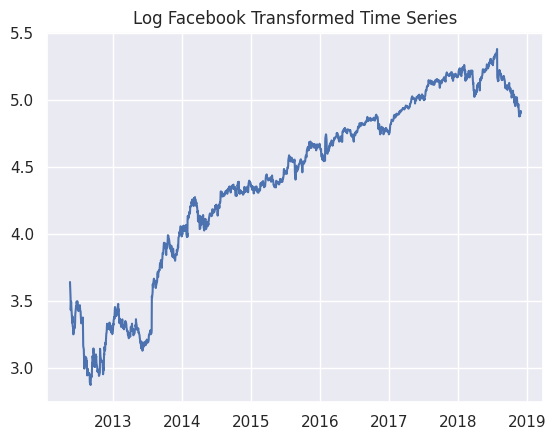

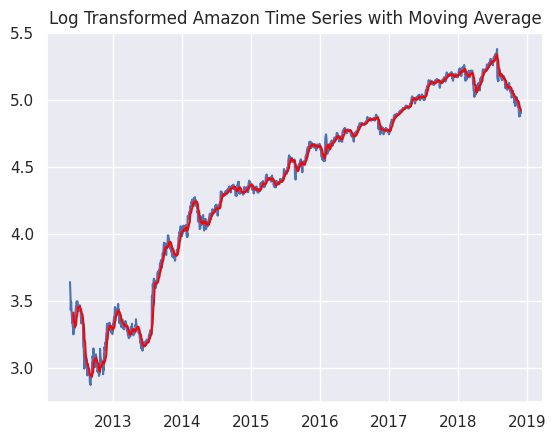

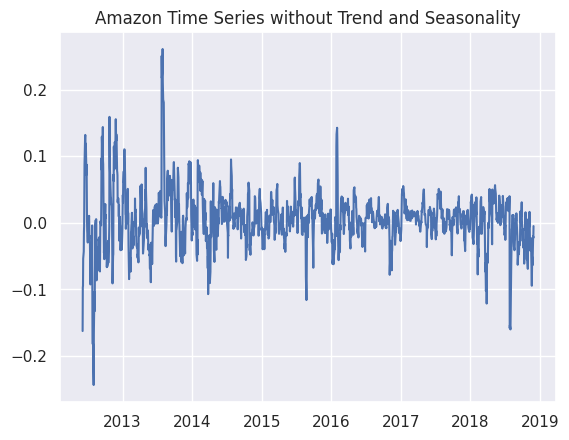

ADF Statistic: -8.344173
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Reject the null hypothesis: The time series is stationary.


In [72]:
# Apply log transformation for facebook
fb_logScale = np.log(df_fb['Close'])
plt.plot(fb_logScale)
plt.title('Log Facebook Transformed Time Series')
plt.show()

# Calculate moving average
movingAverage = fb_logScale.rolling(window=12).mean()
movingSTD = fb_logScale.rolling(window=12).std()
plt.plot(fb_logScale)
plt.plot(movingAverage, color='red')
plt.title('Log Transformed Amazon Time Series with Moving Average')
plt.show()

# Remove trend and seasonality
fb_LogScaleMinusMA = fb_logScale - movingAverage
fb_LogScaleMinusMA.dropna(inplace=True)

plt.plot(fb_LogScaleMinusMA)
plt.title('Amazon Time Series without Trend and Seasonality')
plt.show()

# Check stationarity again
test_results = adfuller(fb_LogScaleMinusMA)
print('ADF Statistic: %f' % test_results[0])    
print('p-value: %f' % test_results[1])
print('Critical Values:')
for key, value in test_results[4].items():
    print('\t%s: %.3f' % (key, value))
if test_results[1] < 0.05:
	print('Reject the null hypothesis: The time series is stationary.')
else:
	print('Failed to reject the null hypothesis: The time series is non-stationary.')

### Applying Differencing to remove non-stationarity

After differencing, the amazon time series is stationary.


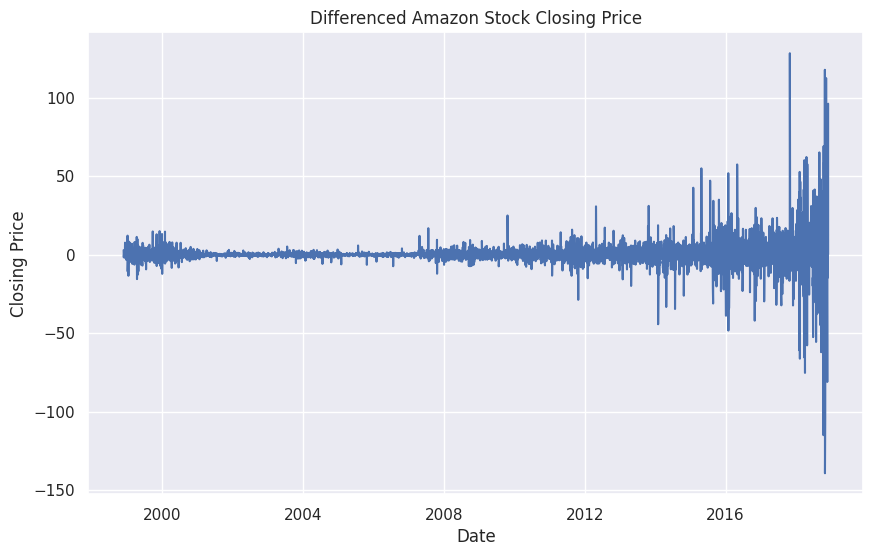

In [73]:
# Check for stationarity after applying differencing - amazon
test_results = adfuller(df_am['Close'])
if test_results[1] < 0.05:
    print('The time series is already stationary.')
else:
    # Difference the data
    differenced_data_am = df_am['Close'].diff().dropna()

    # Check for stationarity again
    test_results = adfuller(differenced_data_am)
    if test_results[1] < 0.05:
        print('After differencing, the amazon time series is stationary.')
    else:
        print('Differencing alone did not achieve stationarity. Additional steps may be required.')


# Plotting the differenced time series - amazon
plt.figure(figsize=(10, 6))
plt.plot(differenced_data_am)
plt.title('Differenced Amazon Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

After differencing, the facebook time series is stationary.


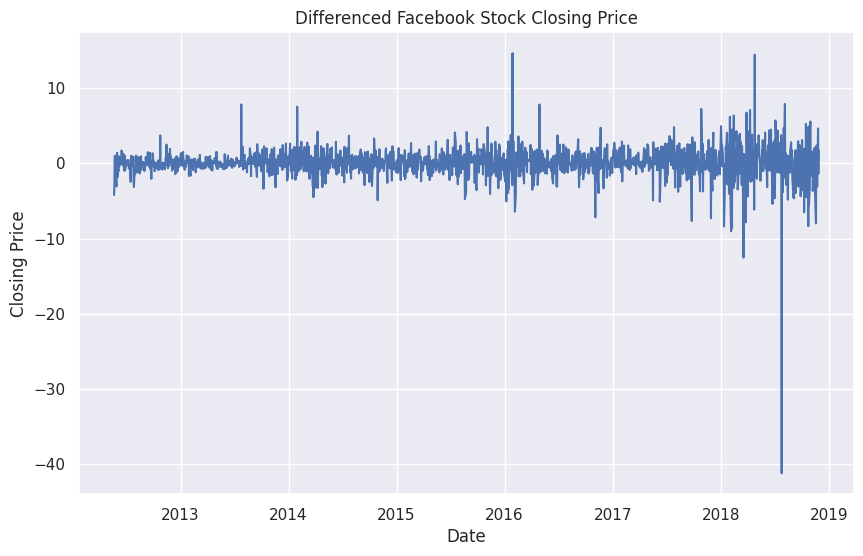

In [74]:
#Check for stationarity after applying differencing - facebook
test_results = adfuller(df_fb['Close'])
if test_results[1] < 0.05:
    print('The time series is already stationary.')
else:
    # Difference the data
    differenced_data_fb = df_fb['Close'].diff().dropna()

    # Check for stationarity again
    test_results = adfuller(differenced_data_fb)
    if test_results[1] < 0.05:
        print('After differencing, the facebook time series is stationary.')
    else:
        print('Differencing alone did not achieve stationarity. Additional steps may be required.')


# Plotting the differenced time series - amazon
plt.figure(figsize=(10, 6))
plt.plot(differenced_data_fb)
plt.title('Differenced Facebook Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

### Plotting ACF, PACF for closing price, (logtransformed - MA) series and differenced series

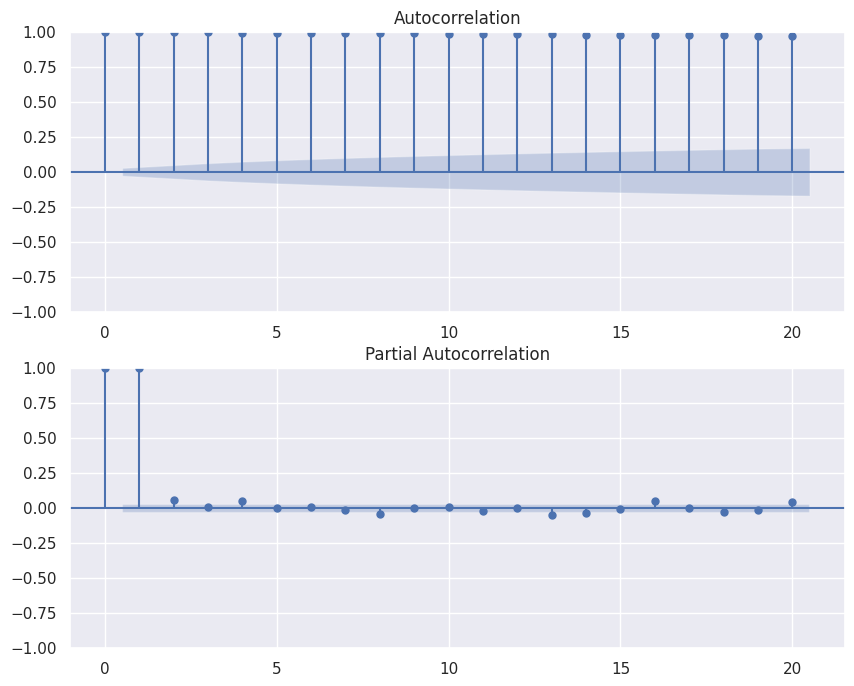

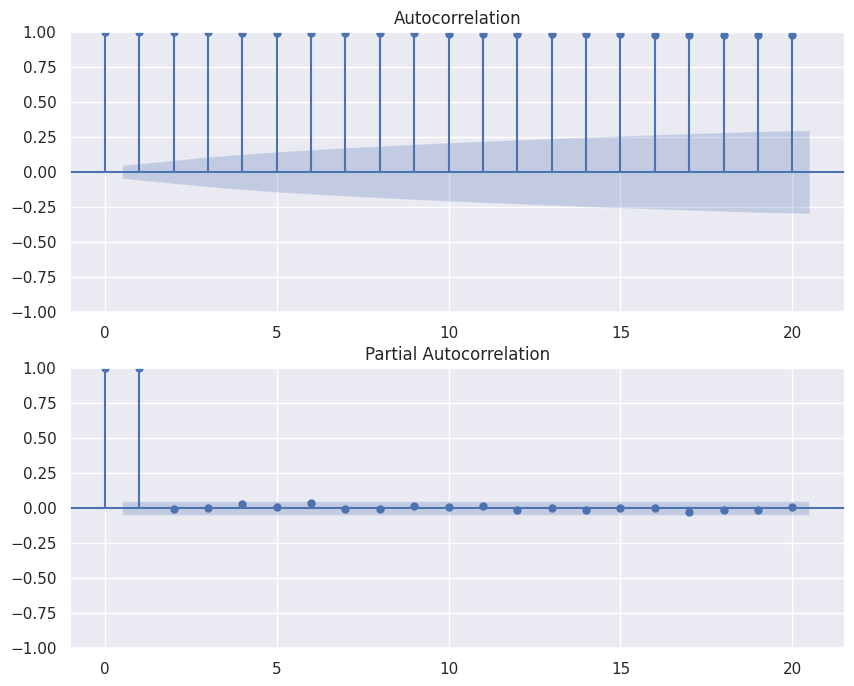

In [75]:
## Plotting ACF and PACF for amazon
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_am, lags=20, ax=ax[0])
plot_pacf(df_am, lags=20, ax=ax[1])
plt.show()

## Plotting ACF and PACF for facebook
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df_fb, lags=20, ax=ax[0])
plot_pacf(df_fb, lags=20, ax=ax[1])
plt.show()

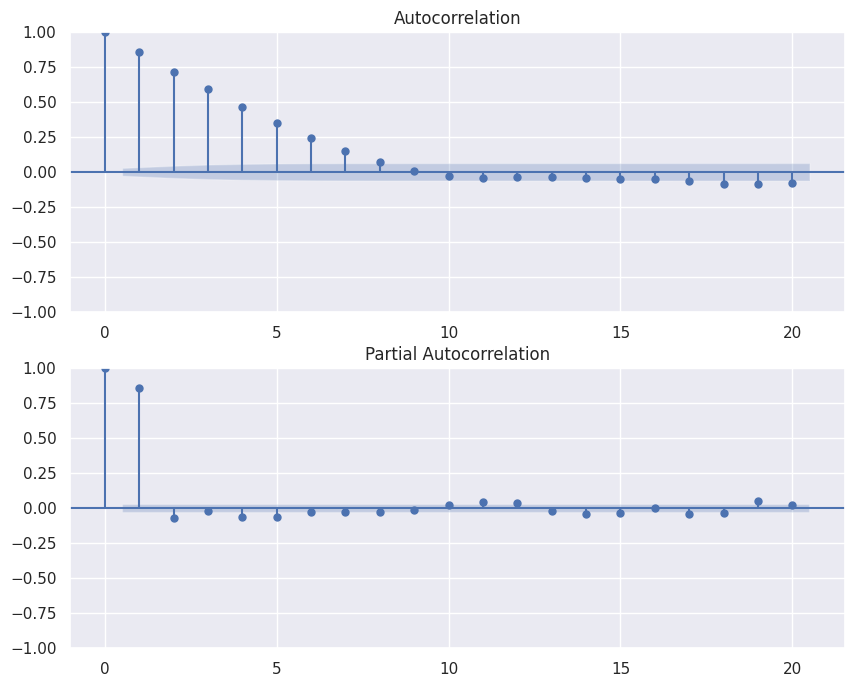

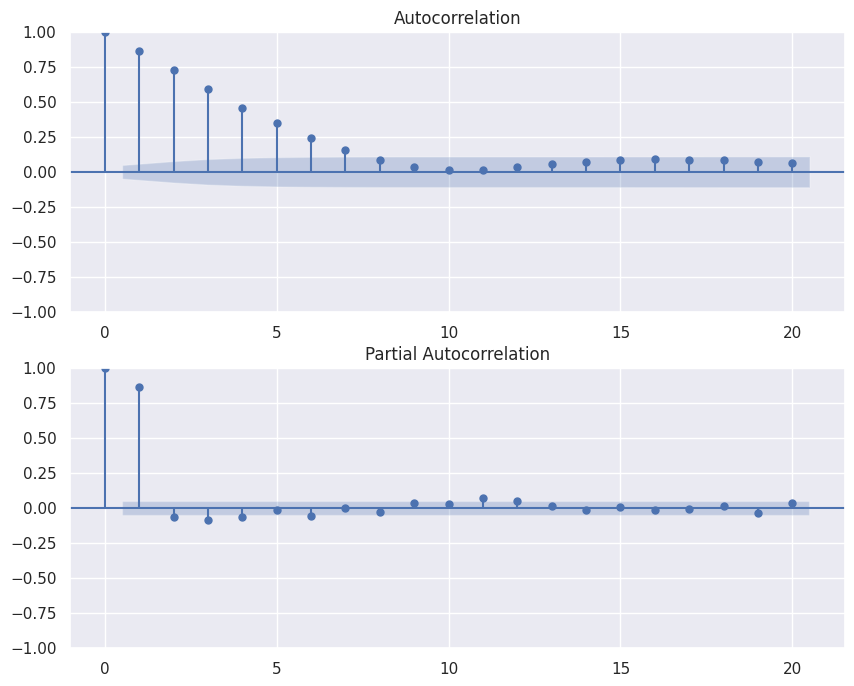

In [76]:
## Ploting ACF and PACF for log transformed amazon
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(am_LogScaleMinusMA, lags=20, ax=ax[0])
plot_pacf(am_LogScaleMinusMA, lags=20, ax=ax[1])
plt.show()

## Ploting ACF and PACF for log transformed facebook
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(fb_LogScaleMinusMA, lags=20, ax=ax[0])
plot_pacf(fb_LogScaleMinusMA, lags=20, ax=ax[1])
plt.show()


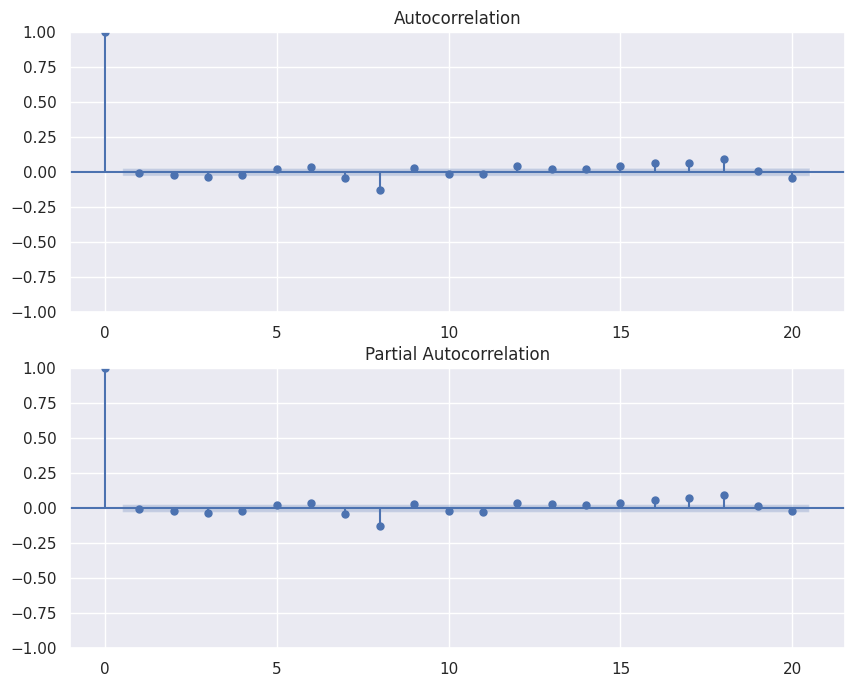

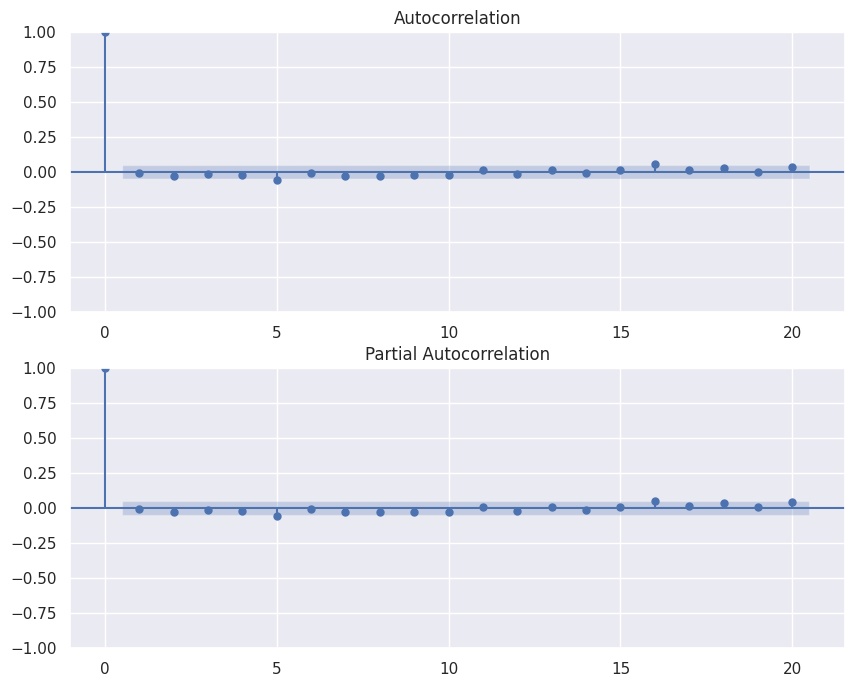

In [77]:
## Plotting ACF and PACF for differenced data - amazon
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(differenced_data_am, lags=20, ax=ax[0])
plot_pacf(differenced_data_am, lags=20, ax=ax[1])
plt.show()

## Plotting ACF and PACF for differenced data - facebook
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(differenced_data_fb, lags=20, ax=ax[0])
plot_pacf(differenced_data_fb, lags=20, ax=ax[1])
plt.show()

In [78]:
df_am

,Close
Date,
1998-11-30,32.000000
1998-12-01,34.916668
1998-12-02,33.250000
1998-12-03,31.583334
1998-12-04,31.416666
...,...
2018-11-21,1516.729980
2018-11-23,1502.060059
2018-11-26,1581.329956


## ARIMA Modelling & Forecasting

Applying ARIMA model directly for closing price for both amazon and facebook in its log form. ARIMA Can handle non-stationariy data as it has AR, MA and I (Differencing) component, it can handle the closing price directly upon tuning of the p,d,q values. But applying the model on the log form anyway for better prediction results as the log form stabilizes variance and is stationary

### Amazon

#### On Direct closing price 

In [79]:

# Apply log transformation to stabilize variance
df_am['Log_Close'] = np.log(df_am['Close'])
df_am

,Close,Log_Close
Date,,
1998-11-30,32.000000,3.465736
1998-12-01,34.916668,3.552964
1998-12-02,33.250000,3.504055
1998-12-03,31.583334,3.452630
1998-12-04,31.416666,3.447339
...,...,...
2018-11-21,1516.729980,7.324312
2018-11-23,1502.060059,7.314593
2018-11-26,1581.329956,7.366022


In [81]:
# Use more recent data for training (e.g., last 2 years)
df_am.index = pd.to_datetime(df_am.index)
df_am = df_am.sort_index()  # Ensure the data is sorted by date


train_data = df_am['Log_Close'].last('730D')
test_data = df_am['Log_Close'].last('90D')


/tmp/ipykernel_6658/386477151.py:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  train_data = df_am['Log_Close'].last('730D')
/tmp/ipykernel_6658/386477151.py:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  test_data = df_am['Log_Close'].last('90D')


In [82]:
train_data

Date
2016-11-29    6.636629
2016-11-30    6.620833
2016-12-01    6.611571
2016-12-02    6.607110
2016-12-05    6.632476
                ...   
2018-11-21    7.324312
2018-11-23    7.314593
2018-11-26    7.366022
2018-11-27    7.366078
2018-11-28    7.425209
Name: Log_Close, Length: 504, dtype: float64

The auro_arima function works by conducting differencing tests (i.e., Kwiatkowski–Phillips–Schmidt–Shin, Augmented Dickey-Fuller or Phillips–Perron) to determine the order of differencing, d, and then fitting models within ranges of defined start_p, max_p, start_q, max_q ranges. If the seasonal optional is enabled, auto_arima also seeks to identify the optimal P and Q hyper- parameters after conducting the Canova-Hansen to determine the optimal order of seasonal differencing, D.



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2662.532, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2660.556, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2660.553, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2660.314, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2658.137, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.378 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  504
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1333.266
Date:                Wed, 09 Oct 2024   AIC                          -2662.532
Time:                        08:04:25   BIC                          -2654.091
Sample:                             0   HQIC                         -2659.220
                                - 504                                  

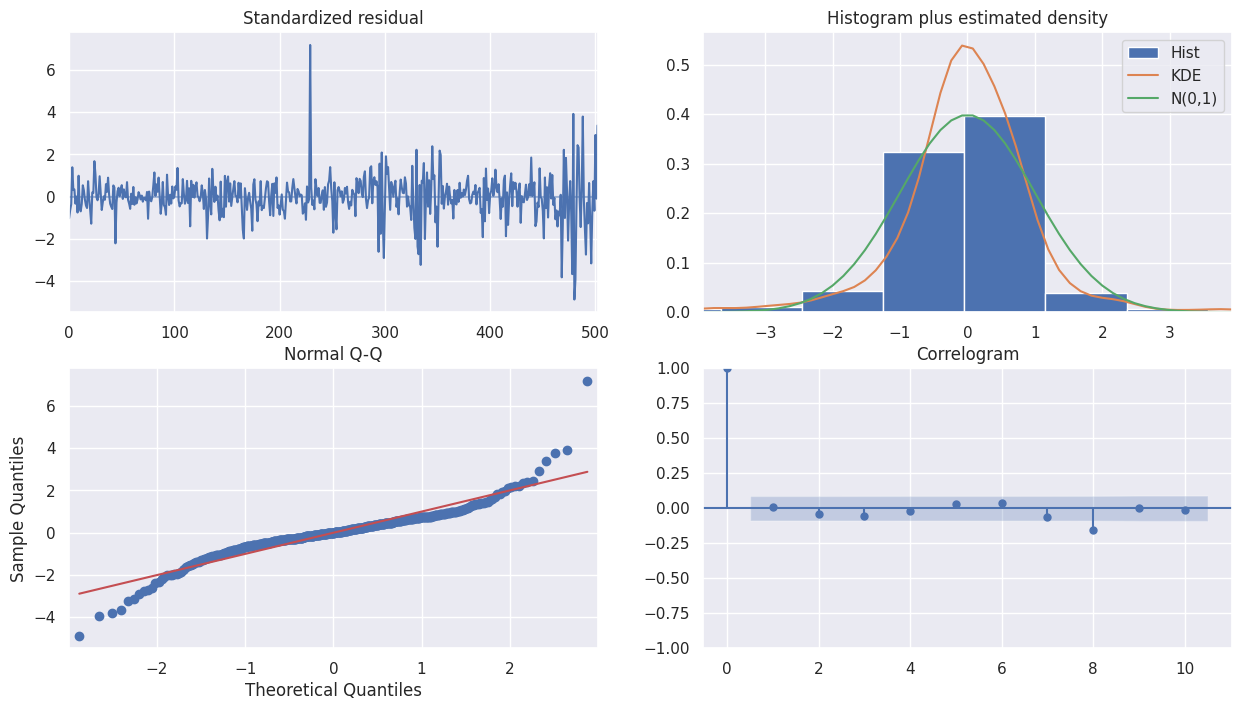

In [83]:
#applying autoarima model to the closing price - checking ideal p,d,q values - amazon
from pmdarima.arima import auto_arima
smodel_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(smodel_autoARIMA.summary())
smodel_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.



In [84]:
#building model using sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = smodel_autoARIMA.order
seasonal_order = smodel_autoARIMA.seasonal_order
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                  504
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1331.157
Date:                Wed, 09 Oct 2024   AIC                          -2660.314
Time:                        08:04:26   BIC                          -2656.094
Sample:                             0   HQIC                         -2658.658
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   8.28e-06     35.539      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1372.39
Prob(Q):                              0.88   Pr

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
# Forecast
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = np.exp(forecast.predicted_mean)  # Convert back from log scale
conf_int = np.exp(forecast.conf_int())


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


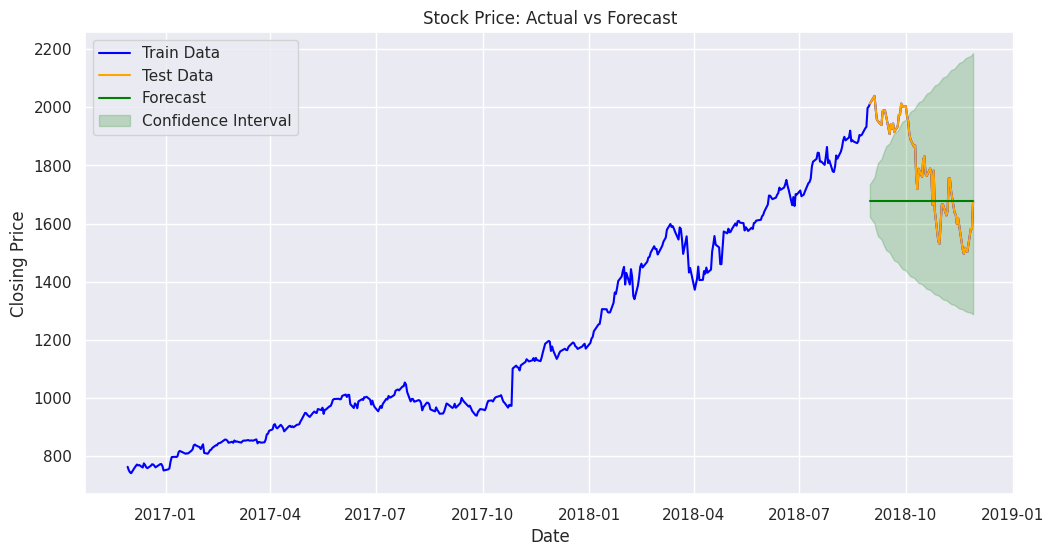

In [86]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_am.index[-len(train_data):], np.exp(train_data), label='Train Data', color='blue')
plt.plot(df_am.index[-len(test_data):], np.exp(test_data), label='Test Data', color='orange')
plt.plot(df_am.index[-len(test_data):], forecast_values, label='Forecast', color='green')
plt.fill_between(df_am.index[-len(test_data):], conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.2, label='Confidence Interval')

plt.title('Stock Price: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [87]:
# Calculate and print error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(np.exp(test_data), forecast_values)
rmse = np.sqrt(mean_squared_error(np.exp(test_data), forecast_values))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")


Mean Absolute Error: 169.78
Root Mean Square Error: 200.56
Mean Absolute Percentage Error: nan%


/tmp/ipykernel_6658/3785545052.py:5: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((np.exp(test_data) - forecast_values) / np.exp(test_data))) * 100


### Facebook

Repeating the same experiement for facebook

In [88]:

# Apply log transformation to stabilize variance
df_fb['Log_Close'] = np.log(df_fb['Close'])

# Use more recent data for training (e.g., last 2 years)
df_fb.index = pd.to_datetime(df_fb.index)
df_am = df_am.sort_index()  # Ensure the data is sorted by date


train_data_fb = df_fb['Log_Close'].last('730D')
test_data_fb = df_fb['Log_Close'].last('90D')


/tmp/ipykernel_6658/2946805789.py:9: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  train_data_fb = df_fb['Log_Close'].last('730D')
/tmp/ipykernel_6658/2946805789.py:10: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  test_data_fb = df_fb['Log_Close'].last('90D')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7714.075, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7712.374, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7712.375, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7714.223, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7710.374, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.840 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1644
Model:               SARIMAX(0, 1, 0)   Log Likelihood                3858.112
Date:                Wed, 09 Oct 2024   AIC                          -7714.223
Time:                        07:57:45   BIC                          -7708.819
Sample:                    01-01-1970   HQIC                         -7712.219
                         - 01-01-1970                                  

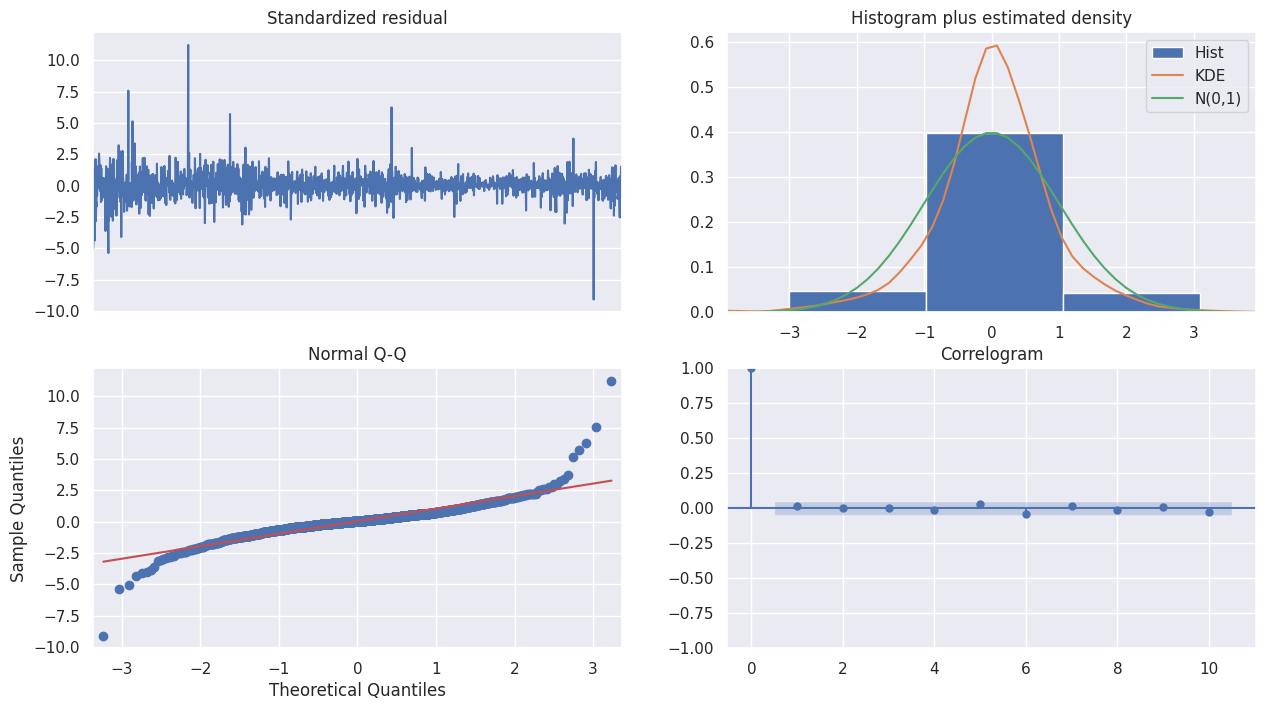

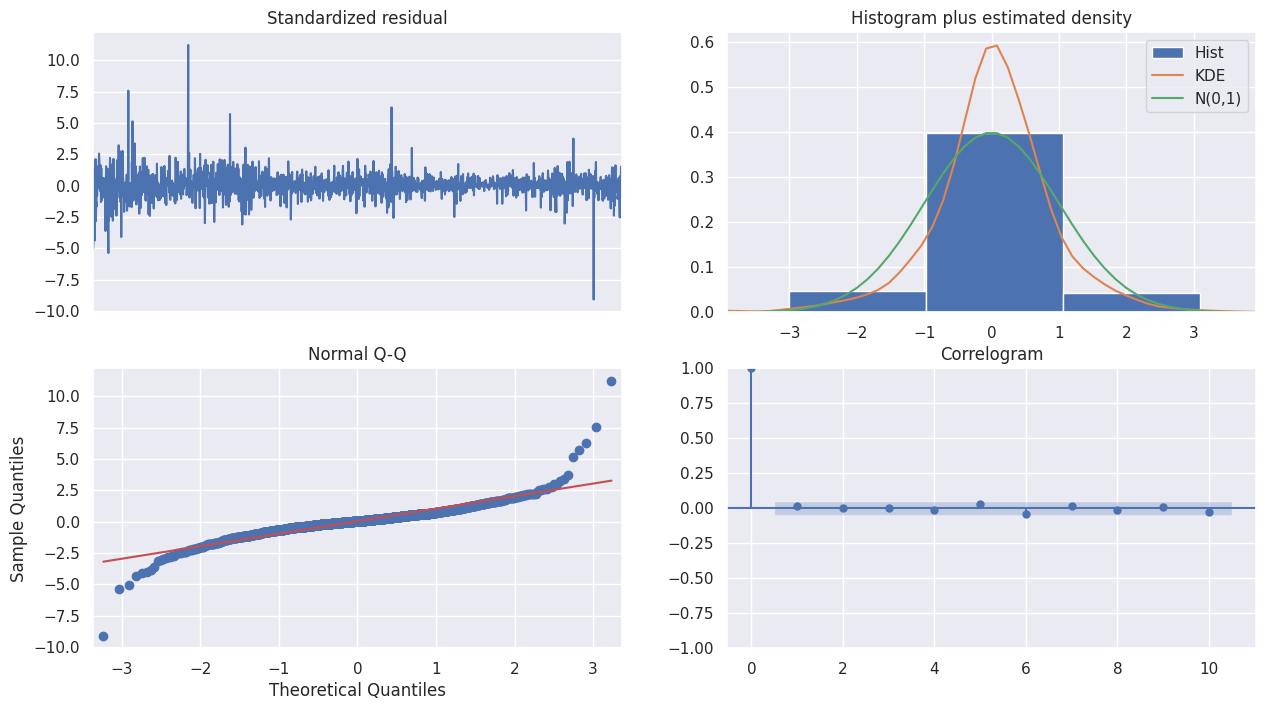

In [42]:
#applying autoarima model to the closing price - checking ideal p,d,q values - amazon
from pmdarima.arima import auto_arima
smodel_autoARIMA = auto_arima(train_data_fb, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(smodel_autoARIMA.summary())
smodel_autoARIMA.plot_diagnostics(figsize=(15,8))

In [89]:
#building model using sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = smodel_autoARIMA.order
seasonal_order = smodel_autoARIMA.seasonal_order
model = SARIMAX(train_data_fb, order=order, seasonal_order=seasonal_order)
model_fit2 = model.fit(disp=False)
print(model_fit2.summary())


                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                  504
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1304.844
Date:                Wed, 09 Oct 2024   AIC                          -2607.687
Time:                        08:04:37   BIC                          -2603.467
Sample:                             0   HQIC                         -2606.031
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   4.67e-06     70.002      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             29796.42
Prob(Q):                              0.54   Pr

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [90]:
# Forecast
forecast_steps = len(test_data_fb)
forecast = model_fit2.get_forecast(steps=forecast_steps)
forecast_values = np.exp(forecast.predicted_mean)  # Convert back from log scale
conf_int = np.exp(forecast.conf_int())


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


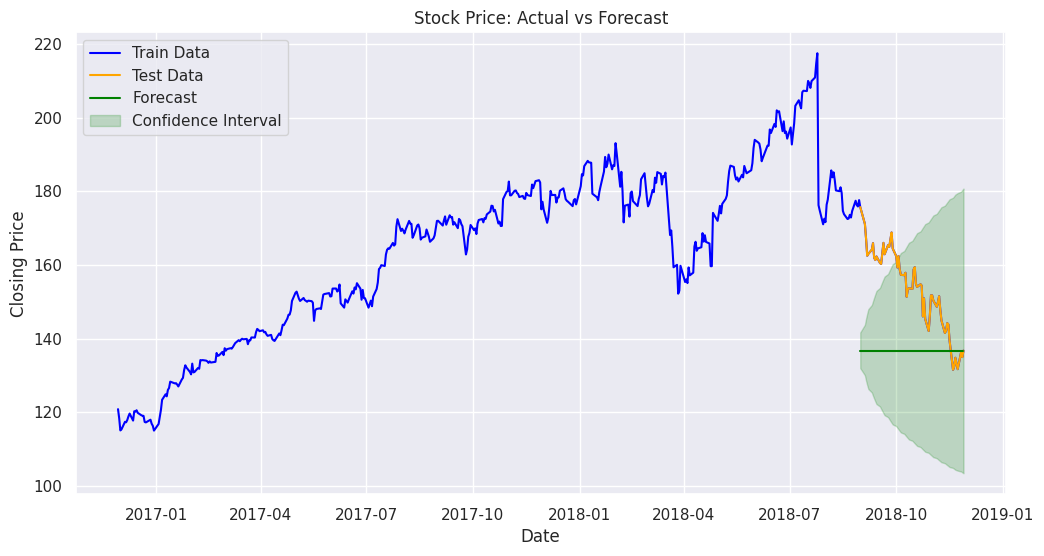

In [91]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_fb.index[-len(train_data_fb):], np.exp(train_data_fb), label='Train Data', color='blue')
plt.plot(df_fb.index[-len(test_data_fb):], np.exp(test_data_fb), label='Test Data', color='orange')
plt.plot(df_fb.index[-len(test_data_fb):], forecast_values, label='Forecast', color='green')
plt.fill_between(df_fb.index[-len(test_data_fb):], conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='green', alpha=0.2, label='Confidence Interval')

plt.title('Stock Price: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [1]:
# Calculate and print error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(np.exp(test_data_fb), forecast_values)
rmse = np.sqrt(mean_squared_error(np.exp(test_data_fb), forecast_values))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")


NameError: name 'np' is not defined

#